In [10]:
import pandas as pd

In [11]:
pip install jieba

Note: you may need to restart the kernel to use updated packages.


In [12]:
#读取数据
text_ana=pd.read_csv('text_analysis_weibo.csv')
text_ana=text_ana.drop(['Unnamed: 0'],axis=1)#Unnamed:需要有空格
text_ana

,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 ​​,0,0,0,a2331b38901d62d2d9a20529177ef3b3,0,22,湖北
1,转发C,0,0,0,d6dc4470f51fce93cc0cbad8abf55a75,0,33,广西
2,【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待...,0,0,0,372bc4782eb442b88035f920a7c1a68e,6,85,广东
3,丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一...,0,0,0,6fe0d482bd3e78a3483e2a1d57f14ef2,75,1012,广东
4,诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！,0,0,0,872380d71d6ee9130e8b49d331f2baa9,0,10,广东
...,...,...,...,...,...,...,...,...
49995,935天气路况早知道 2022年3月2日 星期三 今日限行尾号3和8 8：00分发布 ...,0,0,0,2231ab79796d569625633acafd9f1351,445,74,河南
49996,4月1日起，交通违法记分规则重大调整！ http://t.cn/A66zxfR0 ​​,0,0,0,91c9d380c1cc7811be5ee10ce510d77a,842,54,甘肃
49997,转发C,0,0,1,301771db13798e2dd493c02a44e59444,99,3433,江苏
49998,全体 甘肃车主注意 4月1日起，全面实施！ ...,0,0,0,NaN,0,0,甘肃


In [13]:
#分析语料
text=list(text_ana['标题/微博内容'])
text

['#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 \u200b\u200b',
 '转发C',
 '【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待全能音乐人@刘雨昕 与#运动者联濛#一起，为冬奥赛事助力加油！】',
 '丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一锁定@北京卫视 和门面主舞@时代少年团-丁程鑫 一起过大年，拥抱冰雪，致敬冬奥！',
 '诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！',
 '转发C',
 '#熊猫守护者##全面二创冰墩墩#北京冬奥会如火如荼地进行中，滚滚我的好朋友冰墩墩也十分活跃，看滚滚我做一组舒展运动，为中国健儿加油鼓劲儿！[嘻嘻][嘻嘻] http://t.cn/A6ilerDZ 视频来源：@桃花源生态保护基金会 \u200b\u200b\u200b',
 '转发C',
 '2022北京冬奥会加油！冰墩墩雪容融也非常可爱！期待我国奥运健儿们的精彩表现[开学季]#云支教迎冬奥# \u200b\u200b',
 '和@TFBOYS-易烊千玺 一起助力东奥！一起向未来！',
 '转发C',
 '[心]',
 '守护[心]',
 '#易烊千玺邀你唱响一起向未来# //@M28号星球:#易烊千玺邀你唱响一起向未来# 26.17',
 '//@翔霖神谕:感谢@爱奇艺 的分享。新年胜旧年，春妍惹绚烂，万事胜意与平安喜乐的祝福徒增和乐，@时代少年团-严浩翔 @时代少年团-贺峻霖  同少年关注北京台春晚，拥锦瑟年华岁岁。',
 '好棒[打call][打call][打call]//@只是叭呐呐:哇晒哇晒！厉害我顶起！！！#蔡徐坤代言燕京啤酒# //@蔡徐坤的大喇叭萱:#蔡徐坤[超话]# I#蔡徐坤代言燕京啤酒# 恭喜燕京啤酒，在北京冬奥会官方赞助商冬奥营销传播声量总榜单正式发布位列第三！和代言人@蔡徐坤 一起释放活力，点燃激情，喝彩冬奥！[干杯]',
 '转发C',
 '//@杰克涛:金牌稳了[笑而不语]',
 '转发C',
 '//@许佳琪kiki:#一起冬奥吧# 中国队加油呀⛽️',
 '转发C',
 '蹲',
 '转发',
 '#周深一起向未来高音太绝了#@卡布叻_周深 录制《一起向未来》花絮来了！这漂亮的高音简直绝绝

In [15]:
import jieba

def word_segmentation(text):
    words = jieba.lcut(text)
    return''.join(words)

text_ana['标题/微博内容']=text_ana['标题/微博内容'].astype(str).apply(word_segmentation)
text_ana['标题/微博内容'].head()

0               #高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 ​​
1                                                  转发C
2    【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待...
3    丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一...
4                          诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！
Name: 标题/微博内容, dtype: object

In [16]:
text=list(text_ana['标题/微博内容'].dropna())
text

['#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 \u200b\u200b',
 '转发C',
 '【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待全能音乐人@刘雨昕 与#运动者联濛#一起，为冬奥赛事助力加油！】',
 '丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一锁定@北京卫视 和门面主舞@时代少年团-丁程鑫 一起过大年，拥抱冰雪，致敬冬奥！',
 '诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！',
 '转发C',
 '#熊猫守护者##全面二创冰墩墩#北京冬奥会如火如荼地进行中，滚滚我的好朋友冰墩墩也十分活跃，看滚滚我做一组舒展运动，为中国健儿加油鼓劲儿！[嘻嘻][嘻嘻] http://t.cn/A6ilerDZ 视频来源：@桃花源生态保护基金会 \u200b\u200b\u200b',
 '转发C',
 '2022北京冬奥会加油！冰墩墩雪容融也非常可爱！期待我国奥运健儿们的精彩表现[开学季]#云支教迎冬奥# \u200b\u200b',
 '和@TFBOYS-易烊千玺 一起助力东奥！一起向未来！',
 '转发C',
 '[心]',
 '守护[心]',
 '#易烊千玺邀你唱响一起向未来# //@M28号星球:#易烊千玺邀你唱响一起向未来# 26.17',
 '//@翔霖神谕:感谢@爱奇艺 的分享。新年胜旧年，春妍惹绚烂，万事胜意与平安喜乐的祝福徒增和乐，@时代少年团-严浩翔 @时代少年团-贺峻霖  同少年关注北京台春晚，拥锦瑟年华岁岁。',
 '好棒[打call][打call][打call]//@只是叭呐呐:哇晒哇晒！厉害我顶起！！！#蔡徐坤代言燕京啤酒# //@蔡徐坤的大喇叭萱:#蔡徐坤[超话]# I#蔡徐坤代言燕京啤酒# 恭喜燕京啤酒，在北京冬奥会官方赞助商冬奥营销传播声量总榜单正式发布位列第三！和代言人@蔡徐坤 一起释放活力，点燃激情，喝彩冬奥！[干杯]',
 '转发C',
 '//@杰克涛:金牌稳了[笑而不语]',
 '转发C',
 '//@许佳琪kiki:#一起冬奥吧# 中国队加油呀⛽️',
 '转发C',
 '蹲',
 '转发',
 '#周深一起向未来高音太绝了#@卡布叻_周深 录制《一起向未来》花絮来了！这漂亮的高音简直绝绝

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
#初始化CounVectorizer
vectorizer=CountVectorizer()
#将文本数据转换为词袋特征矩阵
X=vectorizer.fit_transform(text)
#展示特征矩阵的形状
print('词袋特征矩阵的形状:',X.shape)
#展示词袋模型中的所有特征词
print('特征词列表:',vectorizer.get_feature_names_out())

词袋特征矩阵的形状: (50000, 377)
特征词列表: ['1020' '167' '17' '19岁的张哥也要对自己温柔哦' '19岁的张真源会越来越好' '2022北京冬奥会加油' '26'
 '2月5日晚' '5月刊封面' 'a669n33f' 'a66hqzun' 'a66v9mln' 'a6i5bc1o' 'a6ierqv2'
 'a6igrcur' 'a6ikvewj' 'a6ikxrlc' 'a6ilerdz' 'a6ipxoe0' 'a6jy3xv2'
 'a6mn51qh' 'a6xwbtdu' 'an35' 'c2021年度十大mv' 'cn' 'heytea' 'http' 'into1'
 'into1尹浩宇实力vocal' 'into1雪舞花式祝福大赛' 'lm' 'm28号星球' 'nan' 'tfboys' 'to19岁的张哥'
 'wzy' '一休和尚小' '一定有结果' '一封他可能看不到的信' '一起' '一起为东奥写下美好祝福' '一起为冬奥健儿加油'
 '一起为冬奥加油' '一起为奥运健儿加油吧' '一起冬奥吧' '一起助力东奥' '一起向未来' '一起破冰向前' '一起过大年' '一起释放活力'
 '丁程鑫' '丁程鑫后援会官博' '万事胜意与平安喜乐的祝福徒增和乐' '三珩_' '不仅是声音' '不寻常的寒冬突然结束了' '与北京卫视'
 '严浩翔' '中国代表团已经实现了单届冬奥会金牌' '中国新年到' '中国牛逼' '中国的自信' '中国虎虎生威' '中国队加油呀'
 '中央美术学院' '中的小柴火' '为中国健儿加油' '为中国健儿加油鼓劲儿' '为冬奥赛事助力加油' '为冰雪运动喝彩'
 '为北京冬奥冰雪健儿们加油' '为我们展现了最美的奥林匹克精神' '举高高的帅' '也会提醒我们降温了要照顾身体'
 '也是我第一次关注的团内成员生日直播' '也照亮了我' '二十成金筑梦鑫世界' '云支教迎冬奥' '产生的奇妙火花' '什么是北京冬奥精神'
 '从这一天之后' '他不是一个单面' '会和我们说晚安' '会很照顾他们' '会给粉丝录清唱视频' '但总是关心着哥哥们' '你们真不要脸诶'
 '你便是那可以燎原的星星之火' '你十八岁的生日直播是我陪你一起过的第一个生日' '你又像个哥哥兼好朋友' '你好牛' '

In [18]:
list(X)

[<1x377 sparse matrix of type '<class 'numpy.int64'>'
 	with 3 stored elements in Compressed Sparse Row format>,
 <1x377 sparse matrix of type '<class 'numpy.int64'>'
 	with 1 stored elements in Compressed Sparse Row format>,
 <1x377 sparse matrix of type '<class 'numpy.int64'>'
 	with 11 stored elements in Compressed Sparse Row format>,
 <1x377 sparse matrix of type '<class 'numpy.int64'>'
 	with 11 stored elements in Compressed Sparse Row format>,
 <1x377 sparse matrix of type '<class 'numpy.int64'>'
 	with 3 stored elements in Compressed Sparse Row format>,
 <1x377 sparse matrix of type '<class 'numpy.int64'>'
 	with 1 stored elements in Compressed Sparse Row format>,
 <1x377 sparse matrix of type '<class 'numpy.int64'>'
 	with 12 stored elements in Compressed Sparse Row format>,
 <1x377 sparse matrix of type '<class 'numpy.int64'>'
 	with 1 stored elements in Compressed Sparse Row format>,
 <1x377 sparse matrix of type '<class 'numpy.int64'>'
 	with 5 stored elements in Compressed 

In [19]:
#词袋矩阵，每一行每个词出现几次
list(X.toarray())

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [28]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [29]:
# 观察词袋模型的词频计数结果
sorted (word_freq.items(), key=lambda x: x[1], reverse=True)

[('nan', 49900),
 ('转发c', 31),
 ('cn', 13),
 ('http', 11),
 ('时代少年团', 10),
 ('打call', 9),
 ('刘雨昕', 7),
 ('刘雨昕运动者联濛', 6),
 ('宋亚轩', 6),
 ('超话', 6),
 ('运动者联濛', 6),
 ('感谢', 5),
 ('一起向未来', 4),
 ('丁程鑫', 4),
 ('into1', 3),
 ('冰墩墩', 3),
 ('害羞', 3),
 ('明星日常', 3),
 ('林墨', 3),
 ('的分享', 3),
 ('一起', 2),
 ('与北京卫视', 2),
 ('为冬奥赛事助力加油', 2),
 ('产生的奇妙火花', 2),
 ('健儿迎冬奥', 2),
 ('全能唱跳不设限', 2),
 ('分享', 2),
 ('刘耀文', 2),
 ('加油', 2),
 ('单身狗', 2),
 ('卡布叻_周深http', 2),
 ('嘻嘻', 2),
 ('好想罗一舟', 2),
 ('宋亚轩官方后援会', 2),
 ('尹浩宇', 2),
 ('干杯', 2),
 ('开学季', 2),
 ('文轩星系', 2),
 ('易烊千玺邀你唱响一起向未来', 2),
 ('昕春初至万里山河', 2),
 ('期待全能唱跳歌手', 2),
 ('期待全能音乐人', 2),
 ('河山覆冰雪', 2),
 ('继续努力', 2),
 ('脚踏赛场', 2),
 ('蔡徐坤', 2),
 ('蔡徐坤代言燕京啤酒', 2),
 ('赢牛奶', 2),
 ('运动联濛开新年', 2),
 ('逐梦北京', 2),
 ('金牌', 2),
 ('雨你相约助阵冬奥', 2),
 ('1020', 1),
 ('167', 1),
 ('17', 1),
 ('19岁的张哥也要对自己温柔哦', 1),
 ('19岁的张真源会越来越好', 1),
 ('2022北京冬奥会加油', 1),
 ('26', 1),
 ('2月5日晚', 1),
 ('5月刊封面', 1),
 ('a669n33f', 1),
 ('a66hqzun', 1),
 ('a66v9mln', 1),
 ('a6i5bc1o', 1),
 ('a6ierqv2',

In [32]:
pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 217.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 279.3 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 476.3 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 514.3 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 615.9 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 871.5 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 881.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


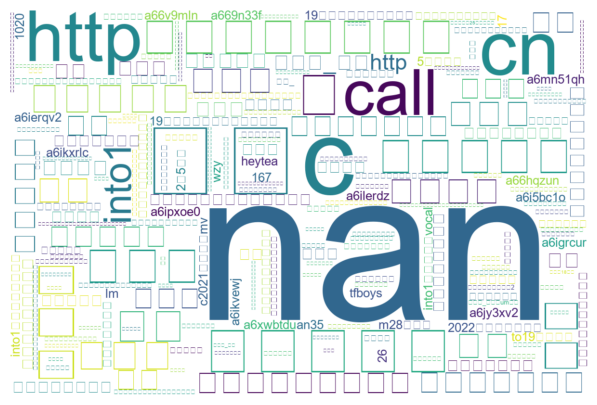

<Figure size 640x480 with 0 Axes>

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

# 根据词袋模型分析结果绘制词云图
wc = WordCloud(
    width=1200, 
    height=800, 
    background_color='white', 
    font_path='arial.ttf'
).generate_from_frequencies(word_freq)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud_twi.png', dpi=100)